In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

### 한국 복지 패널 데이터
- https://www.koweps.re.kr:442/main.do
- 매년 전국 7천에서 8천여 가구를 선정하여 설문 조사 방식으로 삶의 실태를 조사하여 수집한 데이터
- 복지 정책 수립을 목적으로 조사하는 데이터
- 일반인에게 공개하고 있으며 자유롭게 사용이 가능하다.

### spss 를 읽어오기 위한 pyreadstat 모듈을 설치한다.

- 아나콘다 프롬프트를 실행하여 다음과 같이 입력해주세요 :
!conda install pyreadstat (혹은 !pip install pyreadstat)

In [4]:
df = pd.read_spss("data/koweps_hpc19_2024_beta1.sav")
df

,h19_id,h19_ind,h19_sn,h19_merkey,h_new,h_new1,h19_cobf,p19_wsc,p19_wsl,p19_wgc,...,c1907_4aq19,c1907_4aq20,c1907_4aq21,c1907_4aq22,c1907_4aq23,h19_pers_income1,h19_pers_income2,h19_pers_income3,h19_pers_income4,h19_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,0.0,NaN,0.266048,0.268809,1441.082985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,0.0,NaN,0.434904,0.411083,2355.716918,...,NaN,NaN,NaN,NaN,NaN,NaN,2379.0,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,0.0,NaN,0.236213,0.223306,1279.478960,...,NaN,NaN,NaN,NaN,NaN,NaN,720.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.554892,0.506558,3005.647871,...,NaN,NaN,NaN,NaN,NaN,3240.0,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,0.0,NaN,0.848891,0.828363,4598.133895,...,NaN,NaN,NaN,NaN,NaN,NaN,951.0,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,12010.0,17.0,1.0,120101701.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12320.0,NaN,NaN,0.0,NaN
15418,12010.0,17.0,1.0,120101701.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3120.0,NaN,0.0,NaN
15419,12010.0,17.0,1.0,120101701.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
15420,12011.0,17.0,1.0,120111701.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7200.0,-1800.0,0.0,NaN


- h19_g3 : 성별(1:남자, 2:여자, 9:모름/무응답)
- h19_g4 : 태어난 연도(4자리 숫자, 9999:모름/무응답)
- h19_g10 : 혼인상태(0:비해당(18세미만), 1:유배우, 2:사별, 3:이혼, 4:별거, 5:미혼(18세이상, 미혼부, 미혼모 포함), 6:기타(사망 등), 9:모름/무응답)
- h19_g11 : 종교유무(1:있음, 2:없음, 9:모름/무응답)
- h19_eco9 : 직종(직종코드참조, 9999:모름/무응답)
- p1902_8aq1 : 일한 달의 월 평균 임금
- h19_reg7 : 조사 가구의 7개 권역별 지역 구분(1:서울, 2:수도권(인천/경기), 3:부산/울산/경남, 4:대구/경북, 5:대전/충남, 6:강원/충북, 7:광주/전남/전북/제주도, 9:모름/무응답)

In [6]:
print(df['h19_g3'].value_counts().rename_axis('성별'))
print("=" *30)
print(df['h19_g4'].value_counts().rename_axis('출생년도'))
print("=" *30)

성별
2.0    8513
1.0    6909
Name: count, dtype: int64
출생년도
1942.0    336
1947.0    314
1943.0    277
1941.0    273
1955.0    272
         ... 
1924.0      1
1917.0      1
1920.0      1
1923.0      1
1906.0      1
Name: count, Length: 105, dtype: int64


In [7]:
df1 = df[['h19_g3', 'h19_g4', 'h19_g10', 'h19_g11', 'h19_eco9', 'p1902_8aq1', 'h19_reg7']].copy()
df1.columns = ['성별', '출생년도', '혼인상태', '종교유뮤', '직종', '평균임금', '지역']
df1

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,942.0,183.0,1.0
2,1.0,1942.0,3.0,1.0,782.0,NaN,1.0
3,1.0,1962.0,1.0,1.0,855.0,270.0,1.0
4,2.0,1963.0,1.0,1.0,421.0,33.0,1.0
...,...,...,...,...,...,...,...
15417,1.0,1975.0,1.0,2.0,222.0,1010.0,2.0
15418,2.0,1976.0,1.0,2.0,313.0,260.0,2.0
15419,2.0,2009.0,0.0,2.0,NaN,NaN,2.0
15420,1.0,1964.0,1.0,1.0,248.0,NaN,6.0


### 숫자로 되어 있는 범주형 데이터들을 원래의 데이터로 변경한다.

In [9]:
# 성별
df1['성별'].value_counts()

성별
2.0    8513
1.0    6909
Name: count, dtype: int64

In [10]:
d1 = {
    1 : '남자',
    2 : '여자',
    9 : '모름/무응답'
}

df1['성별'] = df1['성별'].map(d1)

# idx1 = df1.query('성별 == 1').index
# df1.loc[idx1, '성별'] = '남자'

# idx2 = df1.query('성별 == 2').index
# df1.loc[idx2, '성별'] = '여자'

# idx3 = df1.query('성별 == 9').index
# df1.loc[idx3, '성별'] = '모름/무응답'

df1['성별'].value_counts()

성별
여자    8513
남자    6909
Name: count, dtype: int64

In [11]:
# 혼인상태

df1['혼인상태'].value_counts()

혼인상태
1.0    7810
5.0    2526
2.0    2322
0.0    1773
3.0     878
4.0      89
6.0      24
Name: count, dtype: int64

In [12]:
d1 = { 0 : "비해당(18세미만)",
      1:"유배우", 
      2:"사별", 
      3:"이혼", 
      4:"별거", 
      5:"미혼", 
      6:"기타", 
      9:"모름/무응답"}

df1['혼인상태'] = df1['혼인상태'].map(d1)
df1['혼인상태'].value_counts()

혼인상태
유배우           7810
미혼            2526
사별            2322
비해당(18세미만)    1773
이혼             878
별거              89
기타              24
Name: count, dtype: int64

In [13]:
df1['종교유뮤'] = df1['종교유뮤'].map({1:"있음", 2:"없음", 9:"모름/무응답"})
df1['종교유뮤'].value_counts()

종교유뮤
없음    8882
있음    6540
Name: count, dtype: int64

In [14]:
df1['지역'] = df1['지역'].map({1:"서울",
                           2:"수도권(인천/경기)", 
                           3:"부산/울산/경남", 
                           4:"대구/경북",
                           5:"대전/충남",
                           6:"강원/충북",
                           7:"광주/전남/전북/제주도",
                           9:"모름/무응답"})
df1['지역'].value_counts()

지역
수도권(인천/경기)      3425
광주/전남/전북/제주도    2794
부산/울산/경남        2647
대구/경북           1828
서울              1798
대전/충남           1605
강원/충북           1325
Name: count, dtype: int64

### 조사 대상에 대한 분포

In [16]:
print(df1.shape)
print("="*30)
print(df1.info())
print("="*30)
print(df1.isna().sum())

(15422, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      15422 non-null  object 
 1   출생년도    15422 non-null  float64
 2   혼인상태    15422 non-null  object 
 3   종교유뮤    15422 non-null  object 
 4   직종      8015 non-null   float64
 5   평균임금    5501 non-null   float64
 6   지역      15422 non-null  object 
dtypes: float64(3), object(4)
memory usage: 843.5+ KB
None
성별         0
출생년도       0
혼인상태       0
종교유뮤       0
직종      7407
평균임금    9921
지역         0
dtype: int64


In [17]:
display(df1.describe(), df1.describe(include = 'O'))

,출생년도,직종,평균임금
count,15422.000000,8015.000000,5501.000000
mean,1969.943587,590.945228,297.934921
std,24.171551,269.377681,230.994026
min,1906.000000,111.000000,0.000000
25%,1949.000000,313.000000,144.000000
50%,1966.000000,611.000000,257.000000
75%,1989.000000,873.000000,393.000000
max,2023.000000,1009.000000,2097.000000


,성별,혼인상태,종교유뮤,지역
count,15422,15422,15422,15422
unique,2,7,2,7
top,여자,유배우,없음,수도권(인천/경기)
freq,8513,7810,8882,3425


In [18]:
# 파이 차트로 성비를 확인한다.
# 성별의 도수를 구한다.
a1 = df1['성별'].value_counts()

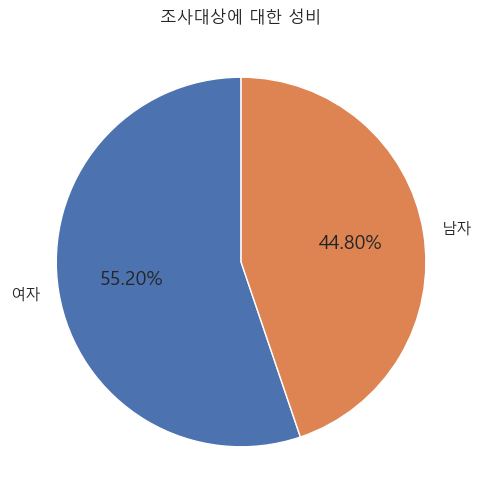

In [19]:
# a1.plot.pie(startangle = 90, autopct = "%.2f%%")
plt.pie(df1['성별'].value_counts(),labels = df1['성별'].value_counts().index, autopct='%.2f%%', startangle=90)
plt.title('조사대상에 대한 성비')
plt.show()

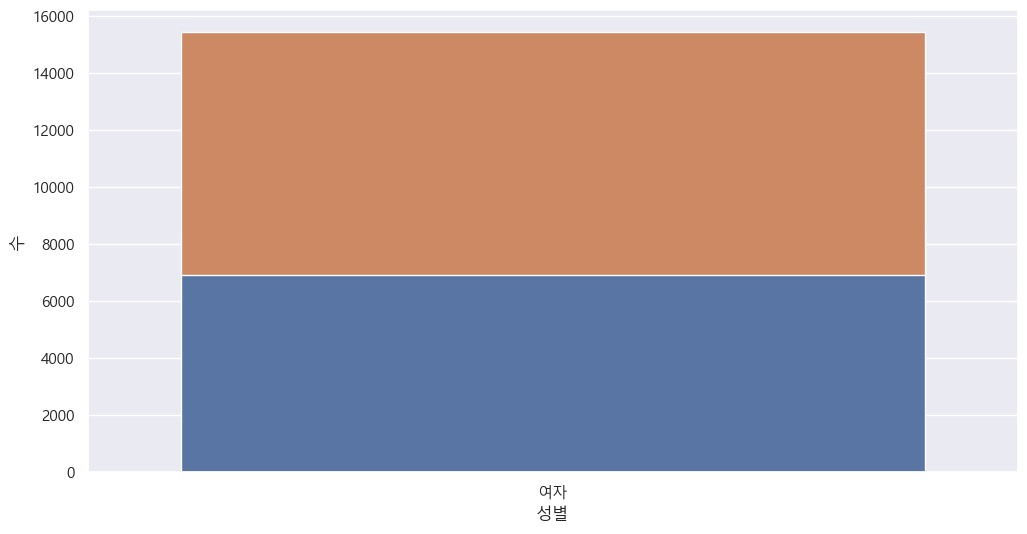

In [20]:
# 성비 도수를 구한다.
a1 = df1['성별'].value_counts()

df100 = pd.DataFrame(a1)
df200 = df100.reset_index()
df200.columns = ['성별', '수']

a1 = df200.query('성별 == "여자"')
a2 = df200.query('성별 == "남자"')

sns.barplot(data=a1, x='성별', y='수')
sns.barplot(data=a1, x='성별', y='수', bottom=a2['수'])

plt.show()

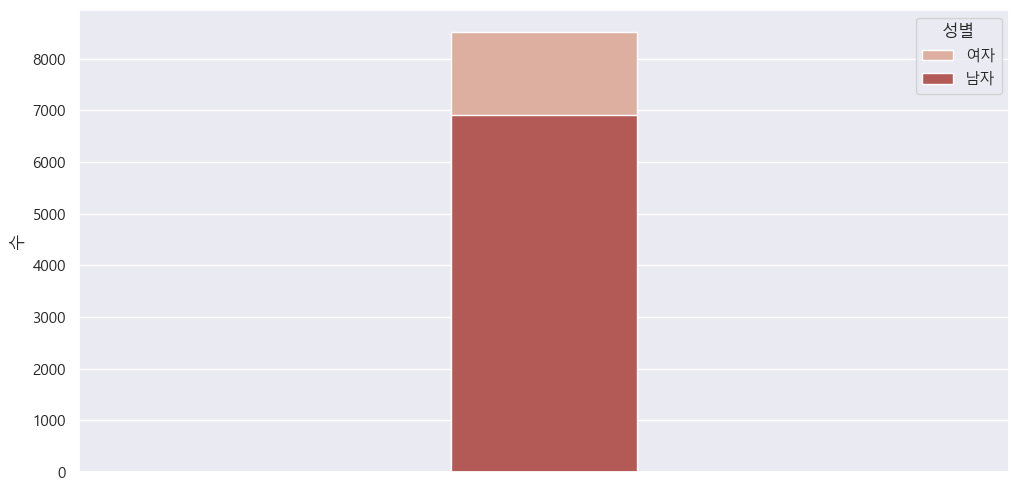

In [21]:
# 성비 도수를 구한다.
a1 = df1['성별'].value_counts()

df100 = pd.DataFrame(a1)
df200 = df100.reset_index()
df200.columns = ['성별', '수']

sns.barplot(data=df200, hue='성별', y='수', dodge=False, fill = 1, saturation = 0.5, palette = 'Reds', width = 0.2)
plt.show()

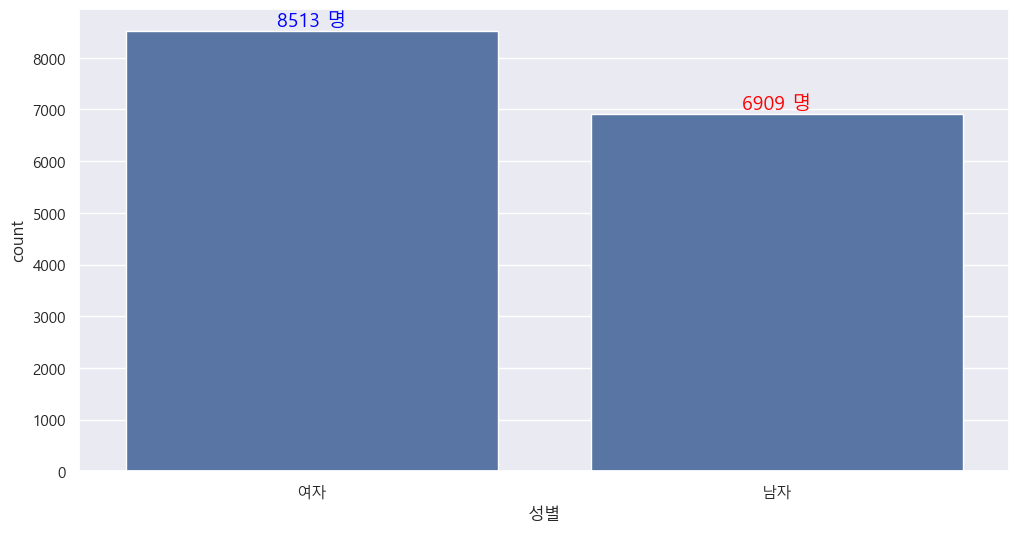

In [22]:
# 양을 비교
sns.countplot(data = df1, x = '성별')

# 도수를 구한다.
성별도수 = df1['성별'].value_counts()

# 글자 색상값
color_list  = ['blue','red']

for idx, value in enumerate(성별도수) :
    # 표시할 문자열
    txt = f'{value} 명'
    # 문자열을 표시한다.
    plt.text(idx,
             value + 100,
             txt,
             horizontalalignment = 'center',
            color = color_list[idx])

plt.show()

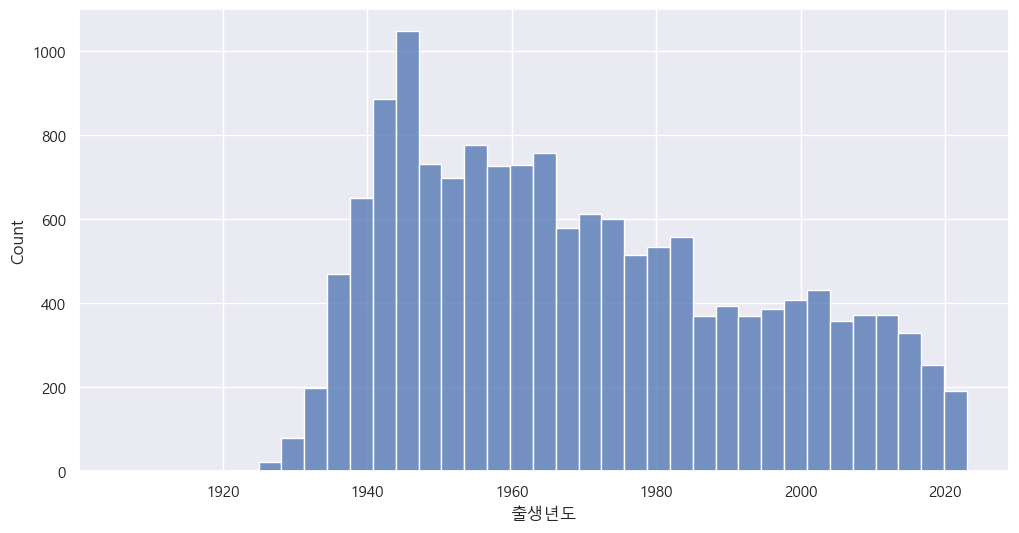

In [23]:
# 출생년도
sns.histplot(data=df1, x='출생년도')
plt.show()

In [24]:
# 나이를 구하기 위해 2023을 뺀다.(2024 년 조사데이터이기 때문)
df1['나이'] = 2023 - df1['출생년도']
df1

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0
...,...,...,...,...,...,...,...,...
15417,남자,1975.0,유배우,없음,222.0,1010.0,수도권(인천/경기),48.0
15418,여자,1976.0,유배우,없음,313.0,260.0,수도권(인천/경기),47.0
15419,여자,2009.0,비해당(18세미만),없음,NaN,NaN,수도권(인천/경기),14.0
15420,남자,1964.0,유배우,있음,248.0,NaN,강원/충북,59.0


In [25]:
df1['연령대'] = ((df1['나이'] // 10 ) * 10).astype('int')
df1

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60
...,...,...,...,...,...,...,...,...,...
15417,남자,1975.0,유배우,없음,222.0,1010.0,수도권(인천/경기),48.0,40
15418,여자,1976.0,유배우,없음,313.0,260.0,수도권(인천/경기),47.0,40
15419,여자,2009.0,비해당(18세미만),없음,NaN,NaN,수도권(인천/경기),14.0,10
15420,남자,1964.0,유배우,있음,248.0,NaN,강원/충북,59.0,50


In [26]:
연령대도수 = df1['연령대'].value_counts().sort_index() #.reset_index().rename(columns = {'count' : '수'})
연령대도수

연령대
0       776
10     1223
20     1242
30     1224
40     1780
50     1945
60     2437
70     2479
80     2083
90      227
100       5
110       1
Name: count, dtype: int64

In [27]:
# # 연령층
# # 연령층 컬럼을 추가한다.
# df1['연령층'] = 0
# # 어린이: 13세 미만의 어린이를 가리킵니다. 
# a1 = df1.query('나이 < 13').index
# df1.loc[a1, '연령층'] = '어린이'
# # 청소년: 13세부터 18세까지의 연령대를 가리킵니다. 
# a1 = df1.query('나이 >= 13 and 나이 <= 18').index
# df1.loc[a1, '연령층'] = '청소년'
# # 청년: 19세부터 30세까지의 연령대를 가리키며, 39세까지 연장될 수도 있습니다. 
# a1 = df1.query('나이 >= 19 and 나이 <= 39').index
# df1.loc[a1, '연령층'] = '청년'
# # 중년: 40세부터 49세까지의 연령대를 가리킵니다. 
# a1 = df1.query('나이 >= 40 and 나이 <= 49').index
# df1.loc[a1, '연령층'] = '중년'
# # 장년: 50세부터 64세까지의 연령대를 가리키며, 중장년으로 포함되기도 합니다. 
# a1 = df1.query('나이 >= 50 and 나이 <= 64').index
# df1.loc[a1, '연령층'] = '장년'
# # 노년: 65세 이상의 연령대를 가리킵니다. 
# a1 = df1.query('나이 >= 65').index
# df1.loc[a1, '연령층'] = '노년'

# df1['연령층'].value_counts()

In [28]:
df1['연령층'] = pd.cut(x = df1['나이'],
                   bins=[0, 12, 18, 39, 49, 64, float('inf')],
                   labels=['어린이', '청소년', '청년', '중년', '장년', '노년'],
                   right=True)

df1['연령층'].value_counts()

연령층
노년     6049
장년     3128
청년     2588
중년     1780
어린이    1141
청소년     730
Name: count, dtype: int64

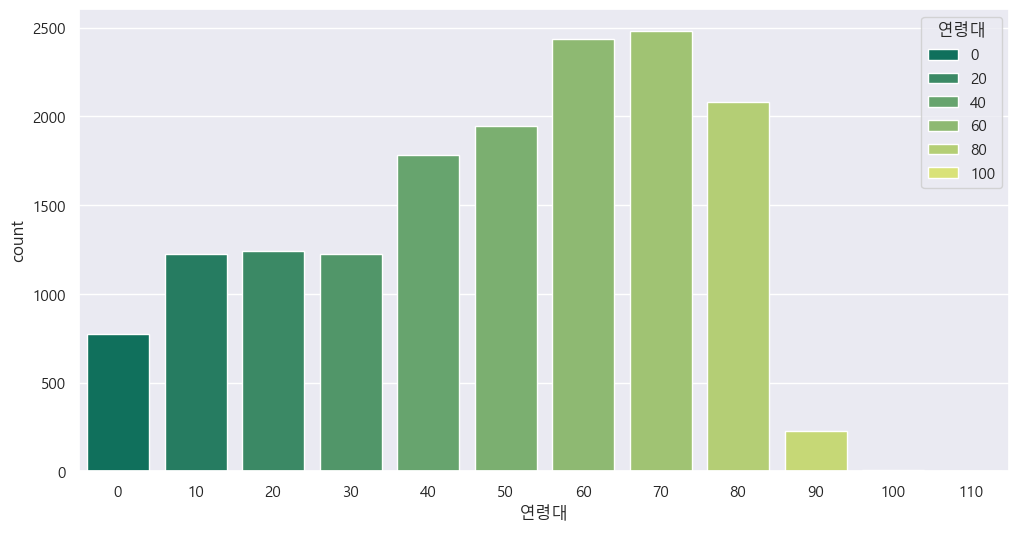

In [29]:
# 연령대 분포
sns.countplot(data=df1, x='연령대', hue='연령대', palette='summer')
plt.show()

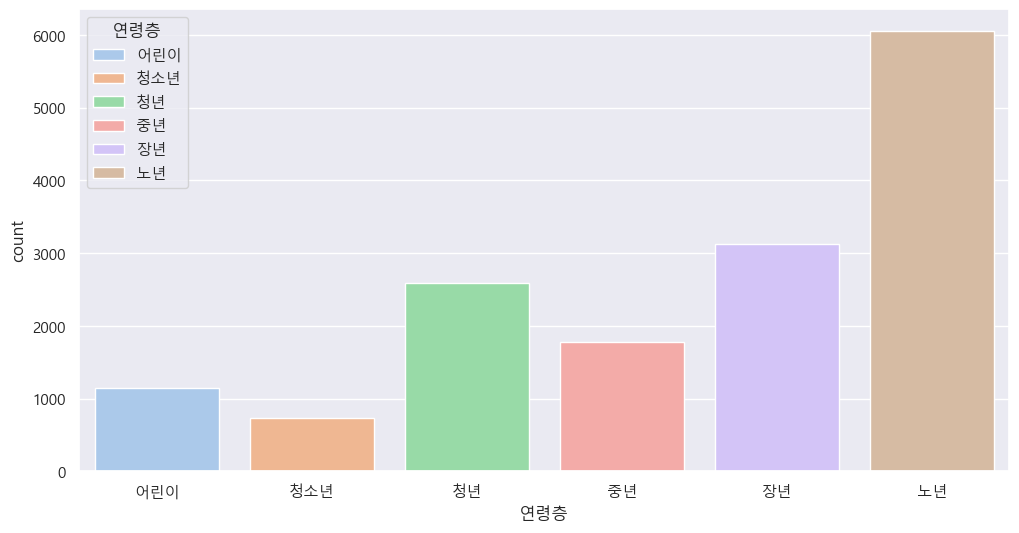

In [30]:
# 연령층 분포
sns.countplot(data=df1, x='연령층', hue='연령층', palette='pastel')
plt.show()

<Axes: xlabel='평균임금', ylabel='Count'>

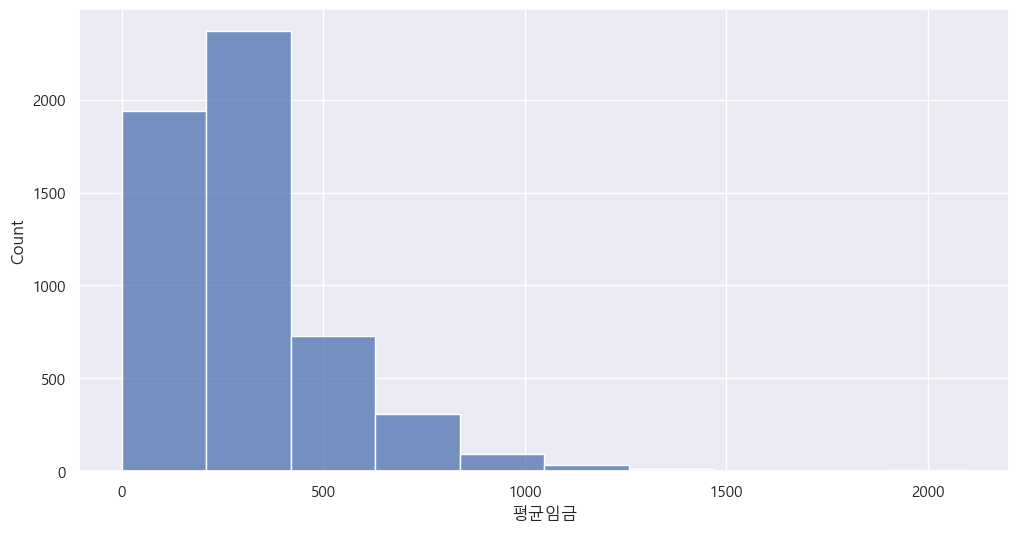

In [31]:
sns.histplot(data = df1, x ='평균임금', bins = 10)

### 1. 각 지역별 성별 구성을 확인한다. 성별별 인원수 및 성비를 모두 확인한다

In [33]:
# 성별과 지역 컬럼을 가져온다.
df2 = df1[['성별', '지역']]
df2

,성별,지역
0,여자,서울
1,남자,서울
2,남자,서울
3,남자,서울
4,여자,서울
...,...,...
15417,남자,수도권(인천/경기)
15418,여자,수도권(인천/경기)
15419,여자,수도권(인천/경기)
15420,남자,강원/충북


In [34]:
# 각 컬럼별로 결측치를 확인한다.
df1.isna().sum()

성별         0
출생년도       0
혼인상태       0
종교유뮤       0
직종      7407
평균임금    9921
지역         0
나이         0
연령대        0
연령층        6
dtype: int64

In [35]:
# 지역과 성별, 그리고 결측치가 없는 컬럼 아무거나 하나를 추출한다.
df2 = df1[['성별', '지역', '출생년도']]
df2

,성별,지역,출생년도
0,여자,서울,1945.0
1,남자,서울,1948.0
2,남자,서울,1942.0
3,남자,서울,1962.0
4,여자,서울,1963.0
...,...,...,...
15417,남자,수도권(인천/경기),1975.0
15418,여자,수도권(인천/경기),1976.0
15419,여자,수도권(인천/경기),2009.0
15420,남자,강원/충북,1964.0


In [36]:
# 지역별 성별별 인구수를 구한다.
result1 = df2.groupby(['지역', '성별']).count()
result1

출생년도
지역           성별      
강원/충북        남자   608
             여자   717
광주/전남/전북/제주도 남자  1242
             여자  1552
대구/경북        남자   771
             여자  1057
대전/충남        남자   726
             여자   879
부산/울산/경남     남자  1172
             여자  1475
서울           남자   803
             여자   995
수도권(인천/경기)   남자  1587
             여자  1838

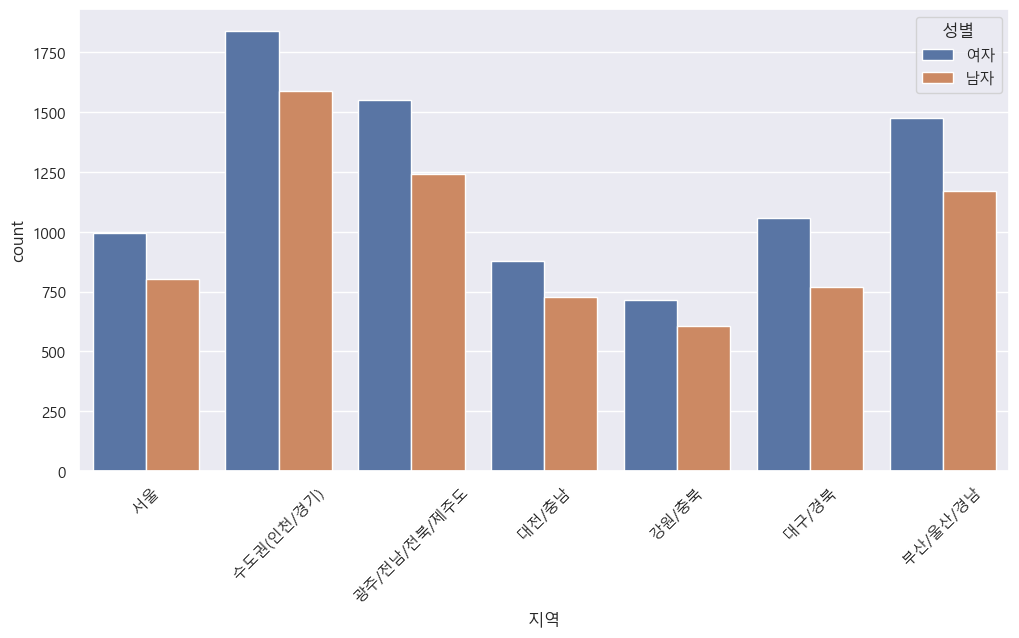

In [37]:
# 시각화
sns.countplot(data=df1, x='지역', hue='성별')
plt.xticks(rotation=45)
plt.show()

In [38]:
# 성비
# 지역별 성별별 인구수를 구한다.
result1 = df2.groupby(['지역', '성별']).count()
# 지역별 인구수를 가져온다.
a2 = df1[['지역', '성별']]
result2 = a2.groupby(['지역']).count()

# 결과를 담을 딕셔너리
result_dict = {}

# 각 지역별 성비를 계산하여 담아준다.
# 각 지역 목록을 가지고 반복한다.
for idx in result2.index :
    # 현재 지역의 총 인구수
    a10 = result2.loc[idx].values[0]
    # 현재 지역의 여자 인구 성비
    a11 = result1.loc[idx].loc['여자'] / a10
    # 현재 지역의 남자 인구 성비
    a12 = result1.loc[idx].loc['남자'] / a10

    result_dict[idx] = {
        '여자' : 0,
        '남자' : 0
    }
    
    result_dict[idx]['여자'] = a11.values[0]
    result_dict[idx]['남자'] = a12.values[0]

result_df = pd.DataFrame(result_dict)
result_df = result_df.T
result_df

,여자,남자
강원/충북,0.541132,0.458868
광주/전남/전북/제주도,0.555476,0.444524
대구/경북,0.578228,0.421772
대전/충남,0.547664,0.452336
부산/울산/경남,0.557235,0.442765
서울,0.553393,0.446607
수도권(인천/경기),0.536642,0.463358


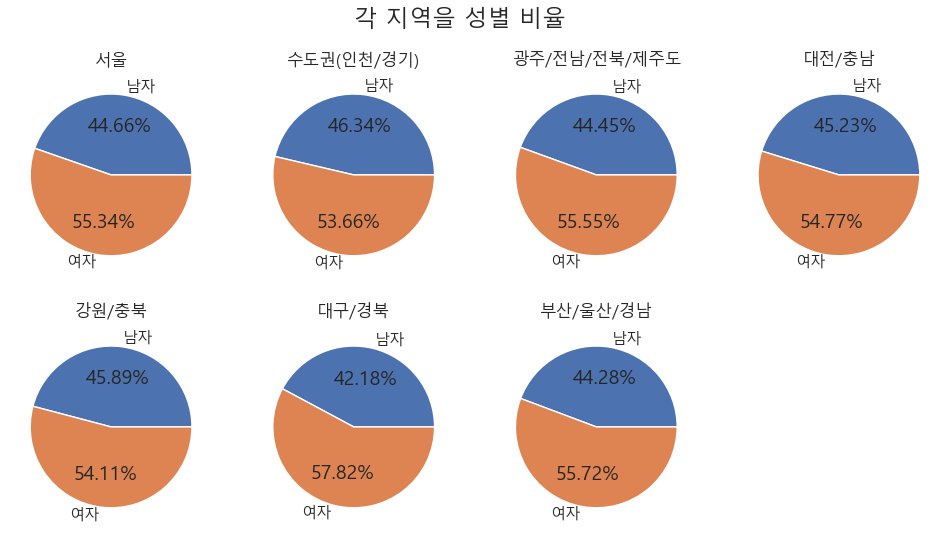

In [39]:
df2 = df1[['성별', '지역', '출생년도']]

df3 = df2.groupby(['지역', '성별']).count()
df3.columns = ['인구수']

# 전체 지역 목록
region_array = df2['지역'].unique()

plt.suptitle('각 지역을 성별 비율')

# 지역의 수 만큼 반복한다.
for idx, region_name in enumerate(region_array) :
    plt.subplot(2, 4, idx + 1)
    # 타이틀
    plt.title(region_name)
    # pie
    plt.pie(
        df3.loc[region_name].values.reshape(-1),
        labels = df3.loc[region_name].index,
        autopct='%.2f%%'
    )

plt.show()

---
아래는 내가 한거

---

<Axes: xlabel='지역', ylabel='수'>

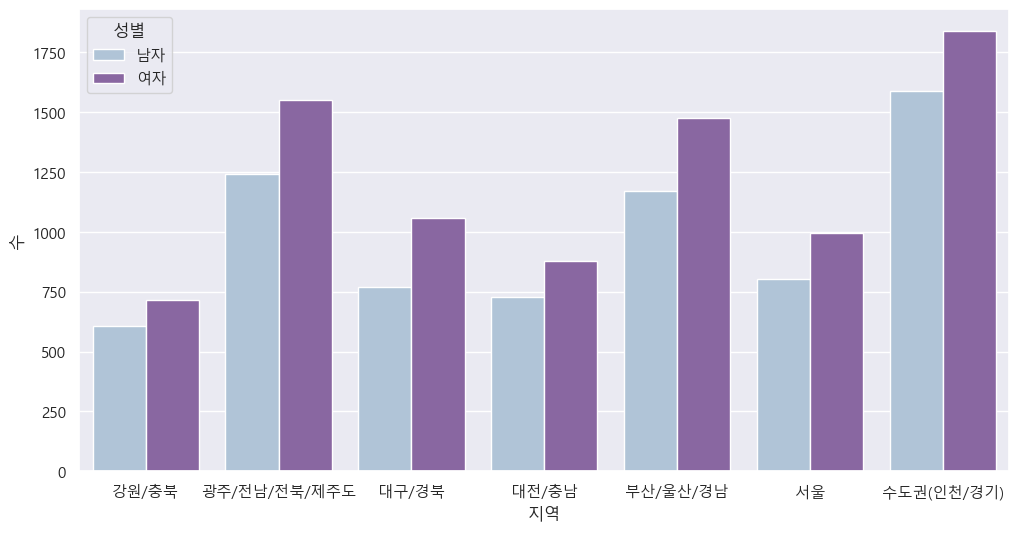

In [41]:
group = df1.groupby(['지역','성별']).size().unstack()
# group['남자비율'] = group['남자']/(group['남자'] + group['여자']) 
# group['여자비율'] = group['여자']/(group['남자'] +group['여자']) 
group = group.reset_index()
group_melted = group.melt(id_vars = '지역', var_name = '성별', value_name = '수')
sns.barplot(data = group_melted, x = '지역', y = '수',  hue = '성별', palette = 'BuPu')

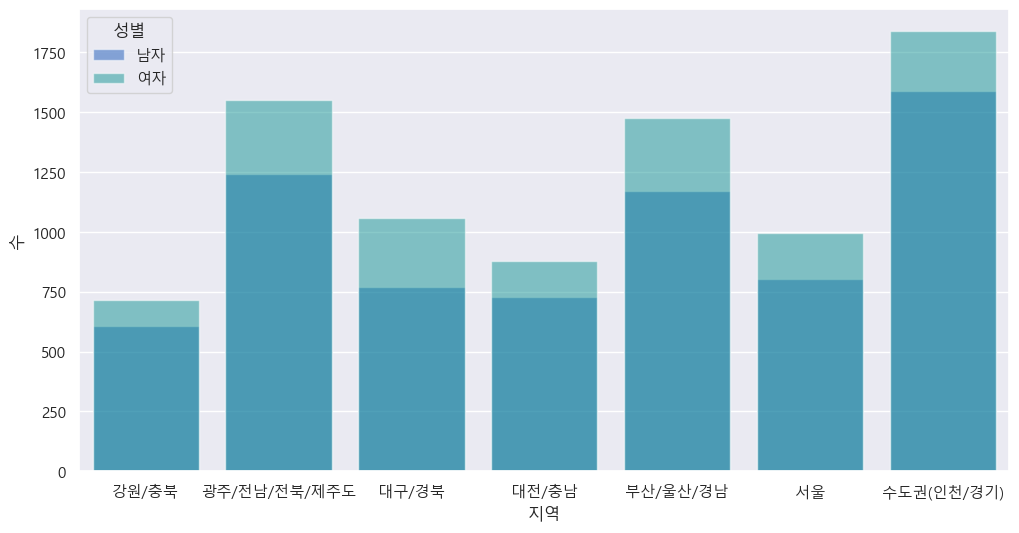

In [42]:
sns.barplot(data = group_melted, x = '지역', y = '수',  hue = '성별', palette = 'winter', dodge = False, alpha=0.5)
plt.show()

In [43]:
group = df1.groupby(['지역','성별']).size().unstack()
group['남자비율'] = group['남자']/(group['남자'] + group['여자']) 
group['여자비율'] = group['여자']/(group['남자'] +group['여자']) 
group = group.reset_index()
group  = group.drop(['남자','여자'], axis = 1)
group

성별,지역,남자비율,여자비율
0,강원/충북,0.458868,0.541132
1,광주/전남/전북/제주도,0.444524,0.555476
2,대구/경북,0.421772,0.578228
3,대전/충남,0.452336,0.547664
4,부산/울산/경남,0.442765,0.557235
5,서울,0.446607,0.553393
6,수도권(인천/경기),0.463358,0.536642


In [44]:
group_melted = group.melt(id_vars = '지역', var_name = '성별비율', value_name = '비율')
group_melted

,지역,성별비율,비율
0,강원/충북,남자비율,0.458868
1,광주/전남/전북/제주도,남자비율,0.444524
2,대구/경북,남자비율,0.421772
3,대전/충남,남자비율,0.452336
4,부산/울산/경남,남자비율,0.442765
5,서울,남자비율,0.446607
6,수도권(인천/경기),남자비율,0.463358
7,강원/충북,여자비율,0.541132
8,광주/전남/전북/제주도,여자비율,0.555476
9,대구/경북,여자비율,0.578228


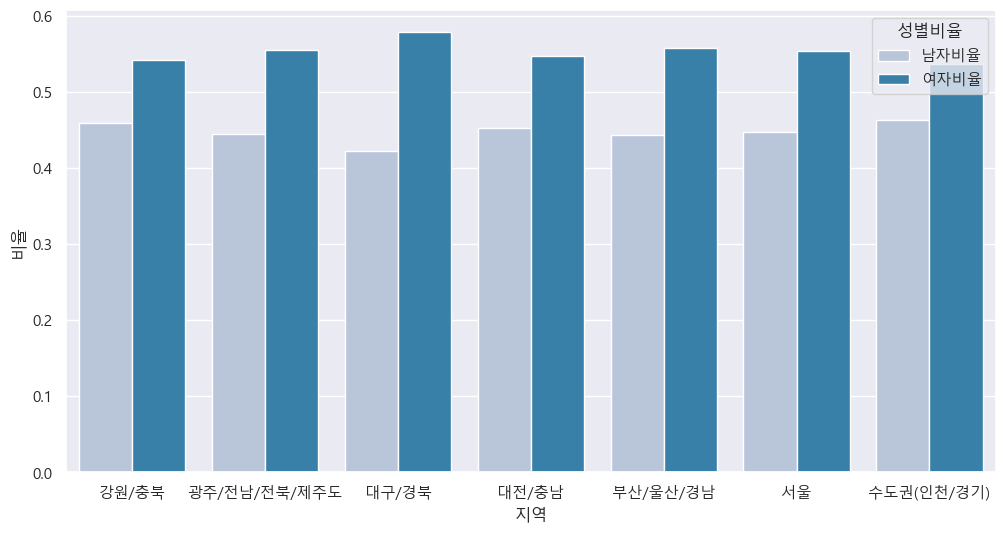

In [45]:
sns.barplot(data = group_melted, x = '지역', y = '비율',  hue = '성별비율', palette = 'PuBu')

plt.show()

### 2. 종교 유무에 따른 이혼율을 확인한다.(미혼, 비해당은 제외한다)

In [47]:
# 혼인상태의 도수를 확인한다.
df1['혼인상태'].value_counts()

혼인상태
유배우           7810
미혼            2526
사별            2322
비해당(18세미만)    1773
이혼             878
별거              89
기타              24
Name: count, dtype: int64

In [48]:
# 이혼한 사람들
df2 = df1.query('혼인상태 == "이혼"')
# 이혼이 아닌 사람들
a1 = ['이혼', '미혼', '비해당', '기타']
df3 = df1.query('혼인상태 not in @a1')

display(df2)
display(df3)

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80,노년
8,여자,1970.0,이혼,있음,151.0,NaN,서울,53.0,50,장년
25,여자,1985.0,이혼,없음,313.0,262.0,서울,38.0,30,청년
28,여자,1961.0,이혼,있음,951.0,NaN,서울,62.0,60,장년
39,여자,1954.0,이혼,있음,421.0,269.0,서울,69.0,60,노년
...,...,...,...,...,...,...,...,...,...,...
15306,남자,1943.0,이혼,없음,NaN,NaN,대전/충남,80.0,80,노년
15307,여자,1944.0,이혼,있음,NaN,NaN,대전/충남,79.0,70,노년
15324,남자,1952.0,이혼,없음,NaN,NaN,대전/충남,71.0,70,노년
15329,남자,1980.0,이혼,없음,873.0,385.0,대전/충남,43.0,40,중년


,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70,노년
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70,노년
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60,장년
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60,장년
6,여자,1934.0,사별,있음,NaN,NaN,서울,89.0,80,노년
...,...,...,...,...,...,...,...,...,...,...
15417,남자,1975.0,유배우,없음,222.0,1010.0,수도권(인천/경기),48.0,40,중년
15418,여자,1976.0,유배우,없음,313.0,260.0,수도권(인천/경기),47.0,40,중년
15419,여자,2009.0,비해당(18세미만),없음,NaN,NaN,수도권(인천/경기),14.0,10,청소년
15420,남자,1964.0,유배우,있음,248.0,NaN,강원/충북,59.0,50,장년


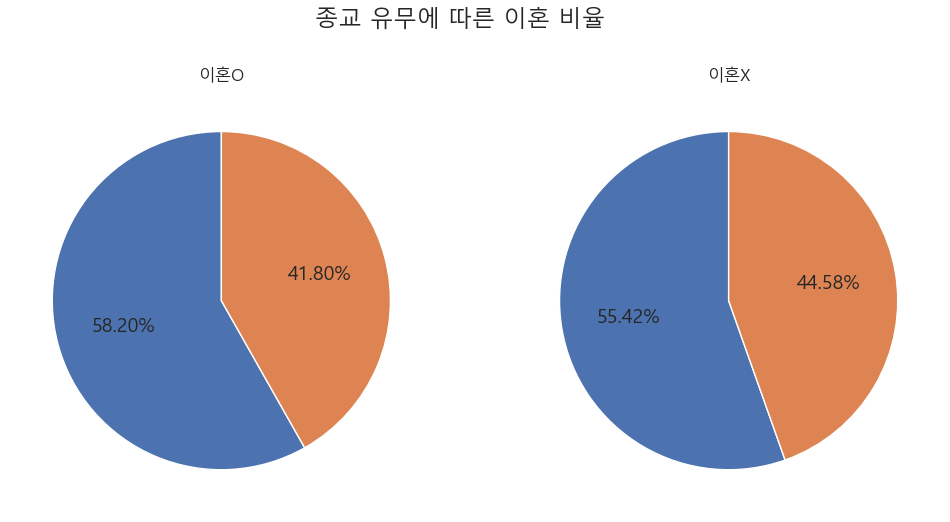

In [49]:
plt.suptitle('종교 유무에 따른 이혼 비율')
# 이혼한 사람들의 종교 유무
a1 = df2['종교유뮤'].value_counts()
plt.subplot(1, 2, 1)
plt.title('이혼O')
plt.pie(a1, startangle=90, autopct='%.2f%%')

# 이혼하지 않은 사람들의 종교 유무
a2 = df3['종교유뮤'].value_counts()
plt.subplot(1, 2, 2)
plt.title('이혼X')
plt.pie(a2, startangle=90, autopct='%.2f%%')

plt.show()

In [50]:
# 혼인 유지 여부 값을 담을 컬럼을 추가한다.
df1['혼인유지'] = '해당없음'

# 이혼한 사람들
idx1 = df1.query('혼인상태 == "이혼"').index
df1.loc[idx1, '혼인유지'] = '이혼상태'

# 혼인을 유지하고 있는 사람들
a1 = ['이혼', '미혼', '비해당', '기타']
idx2 = df1.query('혼인상태 not in @a1').index
df1.loc[idx2, '혼인유지'] = '유지상태'

df1['혼인유지'].value_counts()

혼인유지
유지상태    11994
해당없음     2550
이혼상태      878
Name: count, dtype: int64

In [51]:
# 혼인상태가 해당없는 사람들을 제외하고 모두 가져온다.
df2 = df1.query('혼인유지 != "해당없음"')
# 종교가 있는 사람들을 가져온다.
df3 = df2.query('종교유뮤 == "있음"')
# 종교가 없는 사람들을 가져온다.
df4 = df2.query('종교유뮤 == "없음"')

# 종교가 있는 사람들 중 혼인유지 상태별 수를 구한다.
result_df1 = df3.groupby('혼인유지')['출생년도'].count()
result_df1.name = ''
display(result_df1)

# 종교가 없는 사람들 중 혼인유지 상태별 수를 구한다.
result_df2 = df4.groupby('혼인유지')['출생년도'].count()
result_df2.name = ''
display(result_df2)

혼인유지
유지상태    5347
이혼상태     367
Name: , dtype: int64

혼인유지
유지상태    6647
이혼상태     511
Name: , dtype: int64

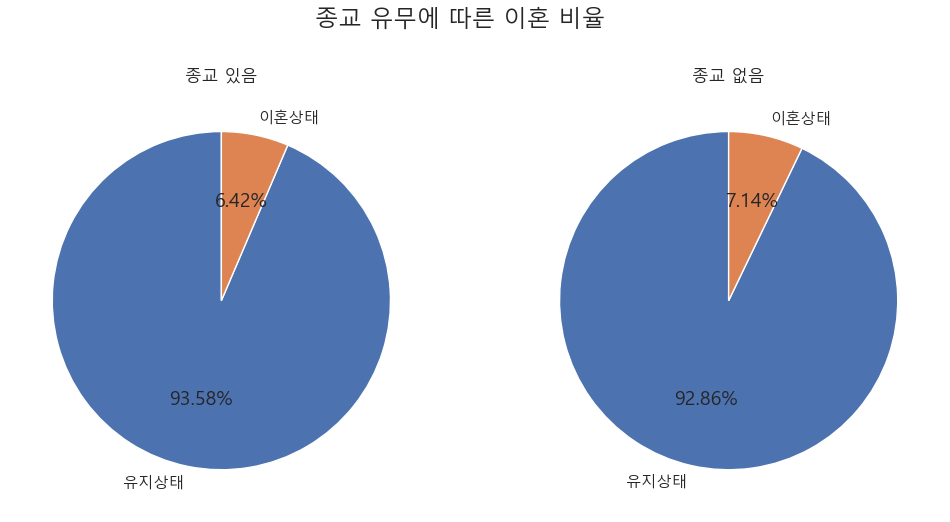

In [52]:
plt.suptitle('종교 유무에 따른 이혼 비율')

plt.subplot(1, 2, 1)
plt.title('종교 있음')
result_df1.plot.pie(startangle=90, autopct='%.2f%%')

plt.subplot(1, 2, 2)
plt.title('종교 없음')
result_df2.plot.pie(startangle=90, autopct='%.2f%%')

plt.show()

---
아래는 내가 한거

---

In [54]:
group_이혼 = df1.query(" 혼인상태 == '이혼' ").groupby(['종교유뮤']).size().reset_index(name='수')
display(group_이혼)
group_이혼아님 = df1.query(" 혼인상태 not in ('이혼', '미혼', '비해당', '기타') ").groupby(['종교유뮤']).size().reset_index(name='수')
display(group_이혼아님)

,종교유뮤,수
0,없음,511
1,있음,367


,종교유뮤,수
0,없음,6647
1,있음,5347


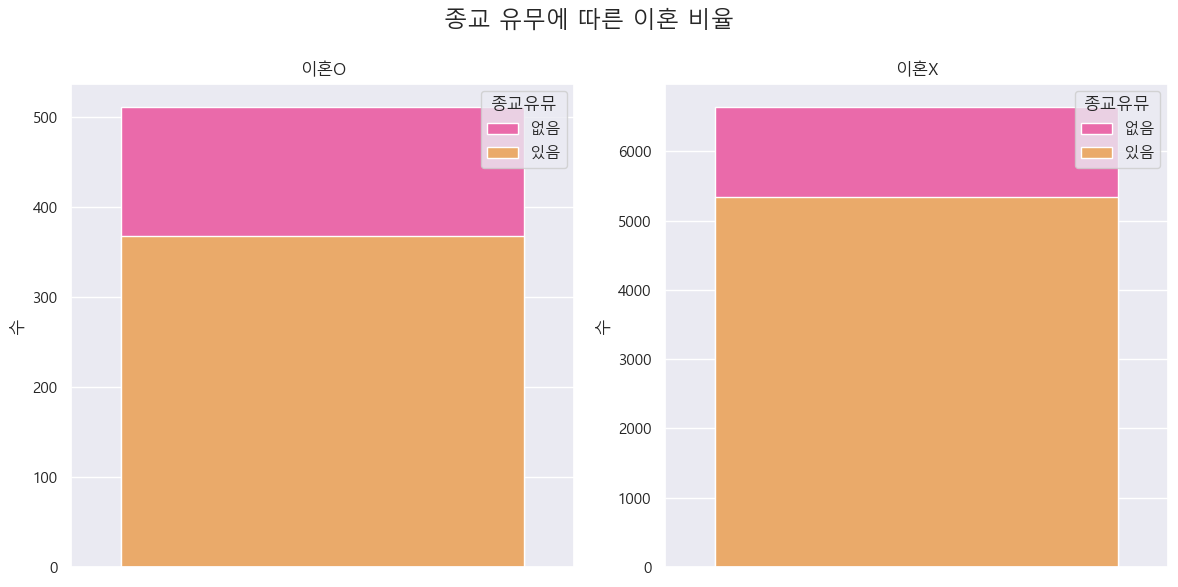

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Figure 크기 설정
plt.suptitle('종교 유무에 따른 이혼 비율')

# 첫 번째 서브플롯: 이혼O
plt.subplot(1, 2, 1)
sns.barplot(data=group_이혼, y='수', hue='종교유뮤', dodge=False, palette='spring')
plt.title('이혼O')

# 두 번째 서브플롯: 이혼X
plt.subplot(1, 2, 2)
sns.barplot(data=group_이혼아님, y='수', hue='종교유뮤', dodge=False, palette='spring')
plt.title('이혼X')

plt.tight_layout()  # 레이아웃 간격 자동 조정
plt.show()


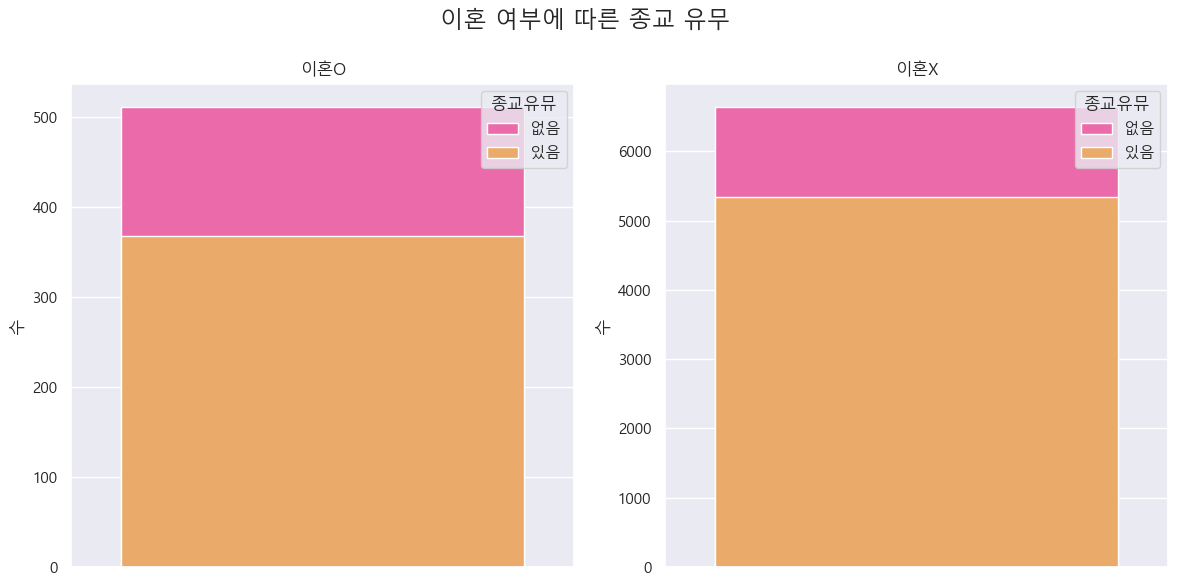

In [56]:
plt.suptitle('이혼 여부에 따른 종교 유무 ')

plt.subplot(1, 2, 1)
sns.barplot(data = group_이혼, y = '수', hue = '종교유뮤' , dodge = False, palette = 'spring')
plt.title('이혼O')

plt.subplot(1, 2, 2)
sns.barplot(data = group_이혼아님, y = '수', hue = '종교유뮤' , dodge = False, palette = 'spring')
plt.title('이혼X')


plt.tight_layout()  # 레이아웃 간격 자동 조정
plt.show()

In [57]:
group_이혼['비율'] = group_이혼['수']/sum(group_이혼['수'])
group_이혼 = group_이혼.drop('수', axis = 1)

group_이혼아님['비율'] = group_이혼아님['수']/sum(group_이혼아님['수'])
group_이혼아님 = group_이혼아님.drop('수', axis = 1)

In [58]:
display(group_이혼,group_이혼아님)

,종교유뮤,비율
0,없음,0.582005
1,있음,0.417995


,종교유뮤,비율
0,없음,0.554194
1,있음,0.445806


In [59]:
group_이혼 = group_이혼.set_index("종교유뮤")
group_이혼아님 = group_이혼아님.set_index("종교유뮤")
display(group_이혼,group_이혼아님)

,비율
종교유뮤,
없음,0.582005
있음,0.417995


,비율
종교유뮤,
없음,0.554194
있음,0.445806


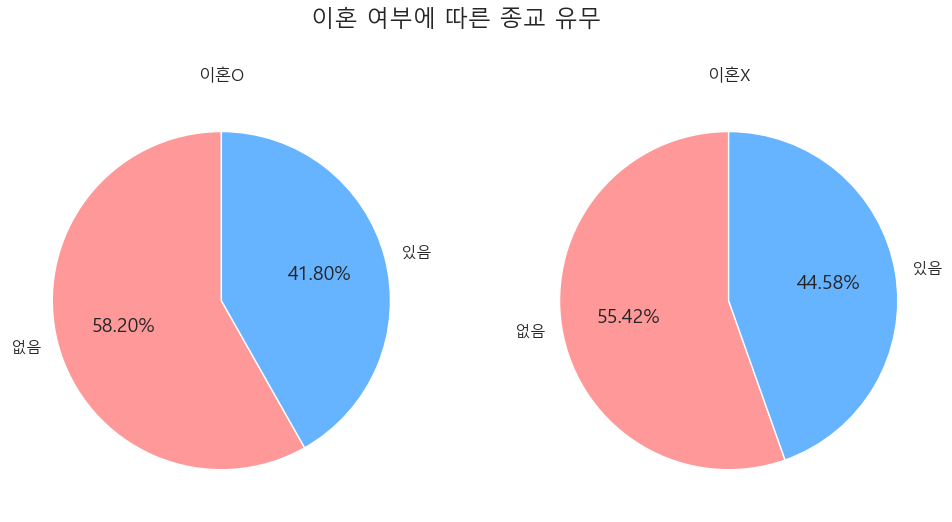

In [60]:
plt.suptitle('이혼 여부에 따른 종교 유무 ')

plt.subplot(1, 2, 1)
plt.pie(x=group_이혼['비율'].values, labels=group_이혼.index, autopct='%.2f%%', startangle=90, colors =  ['#ff9999', '#66b3ff'])
plt.title('이혼O')

plt.subplot(1, 2, 2)
plt.pie(x=group_이혼아님['비율'].values, labels=group_이혼아님.index, autopct='%.2f%%', startangle=90, colors =  ['#ff9999', '#66b3ff'])
plt.title('이혼X')

plt.show()

In [61]:
df2 = df1.copy()
df2.head()

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70,노년,유지상태
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70,노년,유지상태
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80,노년,이혼상태
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60,장년,유지상태
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60,장년,유지상태


In [62]:
df2['혼인상태'].value_counts()

혼인상태
유배우           7810
미혼            2526
사별            2322
비해당(18세미만)    1773
이혼             878
별거              89
기타              24
Name: count, dtype: int64

In [63]:
df3 = df2[['혼인상태','종교유뮤','연령대']].sample(5)
df3

,혼인상태,종교유뮤,연령대
2461,비해당(18세미만),없음,10
9846,미혼,있음,20
14425,비해당(18세미만),없음,0
927,미혼,있음,50
6490,유배우,있음,30


In [64]:
df3['혼인유지'] = df3['혼인상태'].map({
    '유배우' : '유지',
    '별거' : '유지',
    '사별' : '유지',
    '이혼' : '이혼',
    '비해당(18세미만)' : '해당없음'
})

df3

,혼인상태,종교유뮤,연령대,혼인유지
2461,비해당(18세미만),없음,10,해당없음
9846,미혼,있음,20,NaN
14425,비해당(18세미만),없음,0,해당없음
927,미혼,있음,50,NaN
6490,유배우,있음,30,유지


### 3. 각 연령대별 평균 급여를 확인하여 가장 높은 급액의 연령대를 확인한다.

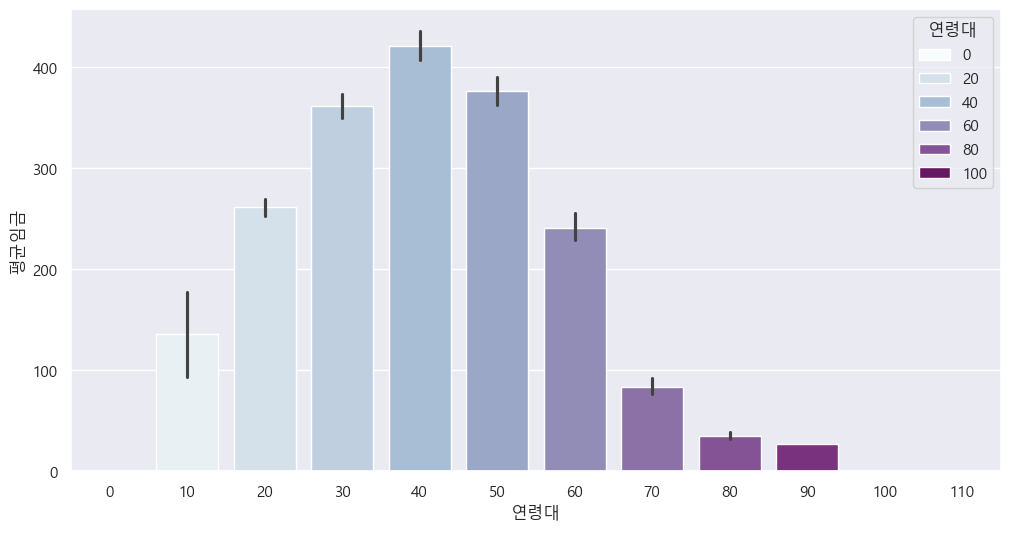

In [66]:
sns.barplot(data = df1, x ='연령대', y= '평균임금', hue = '연령대', palette = 'BuPu')
plt.show()

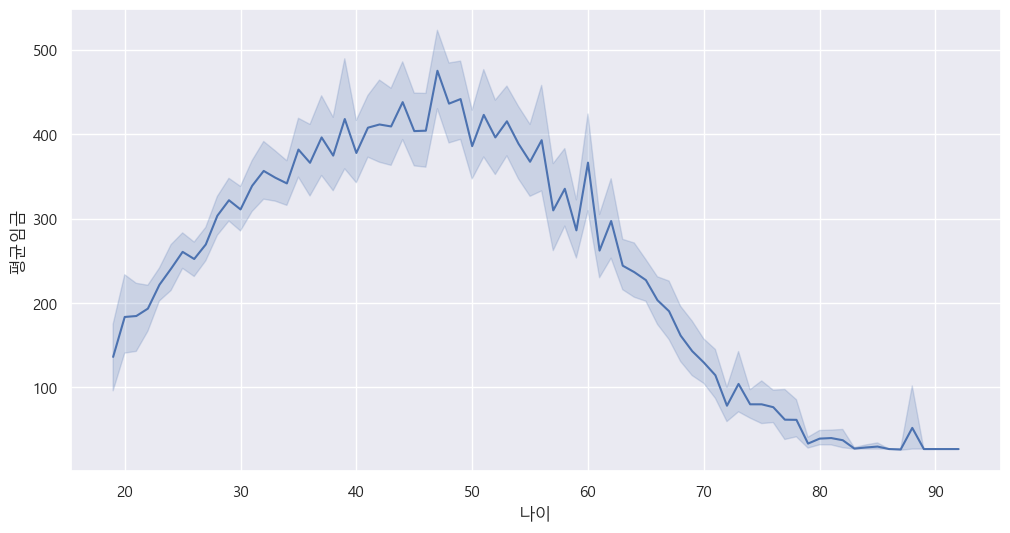

In [67]:
sns.lineplot(data=df1, x = '나이', y='평균임금')
plt.show()

### 4. 각 지역별로 어느 연령층이 가장 많은지 확인한다

In [69]:
df1.sample(4)

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지
6017,여자,1965.0,유배우,없음,NaN,NaN,수도권(인천/경기),58.0,50,장년,유지상태
7958,여자,1948.0,유배우,있음,941.0,27.0,광주/전남/전북/제주도,75.0,70,노년,유지상태
1731,남자,2014.0,비해당(18세미만),없음,NaN,NaN,부산/울산/경남,9.0,0,어린이,유지상태
7807,여자,1943.0,사별,있음,NaN,NaN,광주/전남/전북/제주도,80.0,80,노년,유지상태


In [70]:
group = df1.groupby(['지역','연령층'], observed=False).size().reset_index(name = '수')
group

,지역,연령층,수
0,강원/충북,어린이,74
1,강원/충북,청소년,54
2,강원/충북,청년,191
3,강원/충북,중년,119
4,강원/충북,장년,287
5,강원/충북,노년,600
6,광주/전남/전북/제주도,어린이,202
7,광주/전남/전북/제주도,청소년,137
8,광주/전남/전북/제주도,청년,411
9,광주/전남/전북/제주도,중년,296


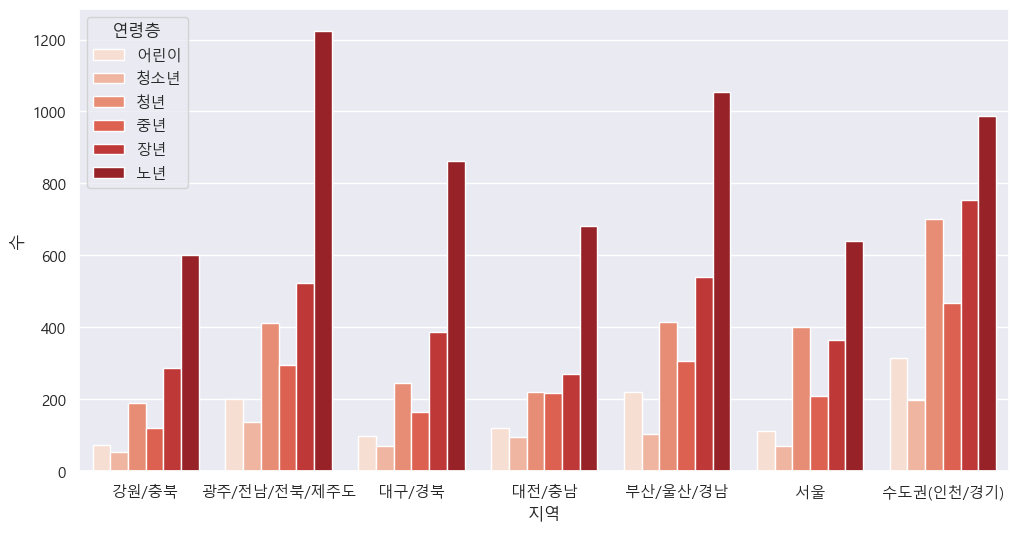

In [71]:
sns.barplot(data = group, x = '지역', y = '수', hue = '연령층', palette = 'Reds')
plt.show()

---
강사

---

In [73]:
# 필요한 데이터를 가져온다.
df2 = df1[['지역', '연령층']]
df2.reset_index(inplace=True)
df2.columns = ['임시값', '지역', '연령층']
df2

,임시값,지역,연령층
0,0,서울,노년
1,1,서울,노년
2,2,서울,노년
3,3,서울,장년
4,4,서울,장년
...,...,...,...
15417,15417,수도권(인천/경기),중년
15418,15418,수도권(인천/경기),중년
15419,15419,수도권(인천/경기),청소년
15420,15420,강원/충북,장년


In [74]:
# 필요한 데이터를 가져온다.
df2 = df1[['지역', '연령층']]
df2.reset_index(inplace=True)
df2.columns = ['임시값', '지역', '연령층']

# 각 지역별 연령층별 인구수를 구한다.
result_df1 = df2.groupby(['지역', '연령층']).count()
result_df1.columns = ['인구수']
result_df1

C:\Users\holic\AppData\Local\Temp\ipykernel_5896\4120055011.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df1 = df2.groupby(['지역', '연령층']).count()


인구수
지역           연령층      
강원/충북        어린이    74
             청소년    54
             청년    191
             중년    119
             장년    287
             노년    600
광주/전남/전북/제주도 어린이   202
             청소년   137
             청년    411
             중년    296
             장년    524
             노년   1223
대구/경북        어린이    99
             청소년    71
             청년    245
             중년    164
             장년    387
             노년    862
대전/충남        어린이   120
             청소년    96
             청년    221
             중년    217
             장년    270
             노년    681
부산/울산/경남     어린이   221
             청소년   104
             청년    416
             중년    307
             장년    541
             노년   1055
서울           어린이   111
             청소년    71
             청년    402
             중년    210
             장년    364
             노년    640
수도권(인천/경기)   어린이   314
             청소년   197
             청년    702
             중년    467
             장년    755
             노년    988

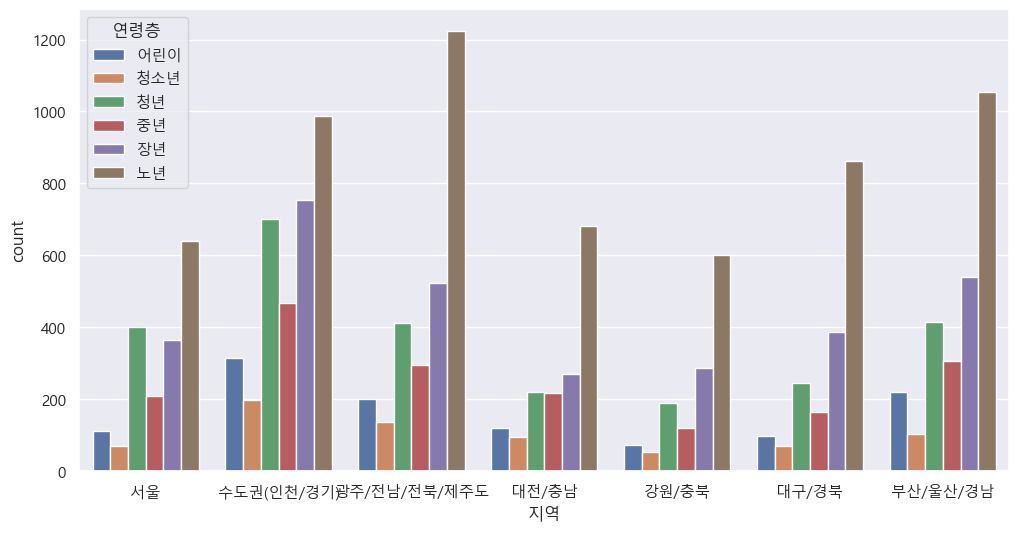

In [75]:
sns.countplot(data=df1, x='지역', hue='연령층')
plt.show()

### 5. 직업이 있는 사람들과 없는 사람들의 비율을 비교한다. 직종 컬럼이 결측치이거 9999인 사람들이 직업이 없는 사람들로 간주한다.

In [77]:
df2 = df1.copy()
df2.head()

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70,노년,유지상태
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70,노년,유지상태
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80,노년,이혼상태
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60,장년,유지상태
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60,장년,유지상태


In [78]:
df2['직업유무'] = 0
df2.head()

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지,직업유무
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70,노년,유지상태,0
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70,노년,유지상태,0
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80,노년,이혼상태,0
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60,장년,유지상태,0
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60,장년,유지상태,0


In [79]:
df2['직업유무'] = df2['직종'].astype('str').map({
    '9999' : '직업없음',
    'nan' : '직업없음',
    '' : '직업없음'    
}).fillna("직업있음")

df2[['직업유무','직종']].sample(5)

,직업유무,직종
14209,직업있음,246.0
7216,직업있음,234.0
12316,직업있음,441.0
6386,직업있음,510.0
8182,직업있음,245.0


In [80]:
df2['직업유무'].value_counts()

직업유무
직업있음    8015
직업없음    7407
Name: count, dtype: int64

---
강사

---

In [82]:
# 직업이 있는 사람들
df2 = df1.query('직종 != 9999 and 직종.notna()')
# 직업이 없는 사람들
df3 = df1.query('직종 == 9999 or 직종.isna()')

display(df2['직종'].isna().sum())
display(df3['직종'].isna().sum())

0

7407

In [83]:
# 직업이 있는 사람들 수
a1 = len(df2)
# 직업이 없는 사람들 수
a2 = len(df3)

print(f'직업이 있는 사람 : {a1}')
print(f'직업이 없는 사람 : {a2}')

직업이 있는 사람 : 8015
직업이 없는 사람 : 7407


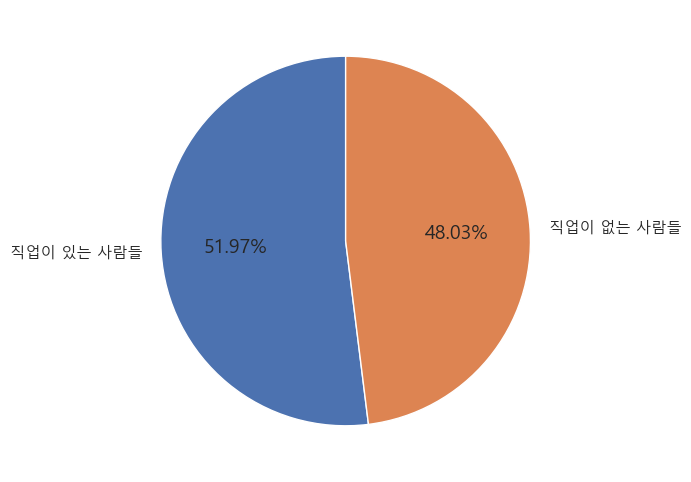

In [84]:
plt.pie(
    [a1, a2],
    labels=['직업이 있는 사람들', '직업이 없는 사람들'],
    startangle=90,
    autopct='%.2f%%',
)
plt.show()

In [85]:
df2 = df1.copy()

내가 그냥 하고싶어서 하는거

In [87]:
df2['직업유무'] = df2['직종'].astype('str').map({
    '9999' : '직업없음',
    'nan' : '직업없음',
    '' : '직업없음'    
}).fillna("직업있음")

df2[['직업유무','직종']].sample(5)

,직업유무,직종
3553,직업있음,941.0
11633,직업없음,NaN
13896,직업없음,NaN
13833,직업있음,139.0
11380,직업없음,NaN


In [88]:
df2.sample()

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지,직업유무
2058,남자,1970.0,유배우,있음,761.0,615.0,부산/울산/경남,53.0,50,장년,유지상태,직업있음


In [89]:
df2[['연령대','직업유무']].describe(include = 'object')

,직업유무
count,15422
unique,2
top,직업있음
freq,8015


In [90]:
group = df2.groupby(['연령대','직업유무']).size().reset_index(name = '수')
group

,연령대,직업유무,수
0,0,직업없음,776
1,10,직업없음,1203
2,10,직업있음,20
3,20,직업없음,533
4,20,직업있음,709
5,30,직업없음,256
6,30,직업있음,968
7,40,직업없음,354
8,40,직업있음,1426
9,50,직업없음,408


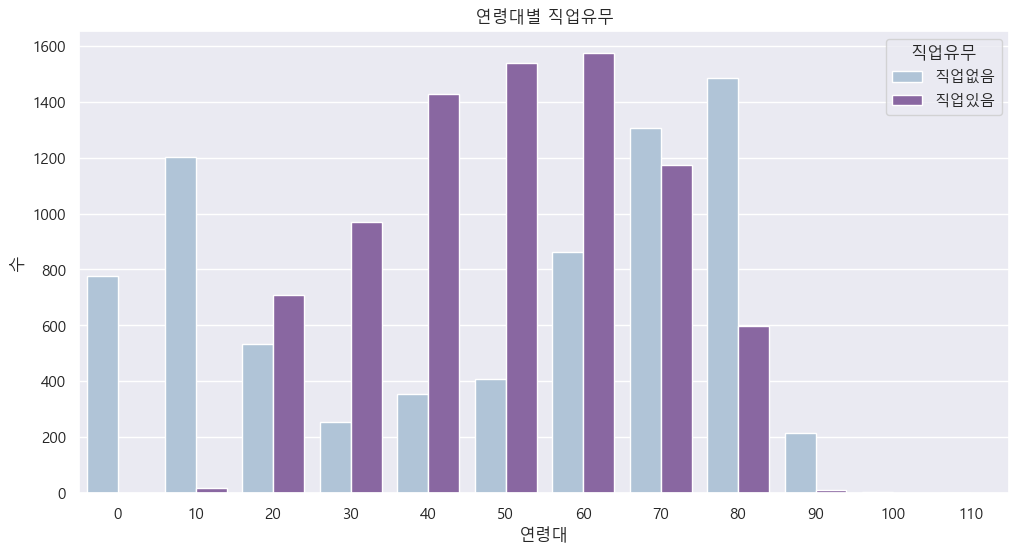

In [91]:
sns.barplot(data = group, x = '연령대', y = '수' , hue = '직업유무', palette = 'BuPu')
plt.title('연령대별 직업유무')
plt.show()

### 6. 각 지역별 20대의 평균 임금을 비교한다.

In [93]:
df1.head()

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70,노년,유지상태
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70,노년,유지상태
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80,노년,이혼상태
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60,장년,유지상태
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60,장년,유지상태


In [94]:
group = df1.query('연령대 == 20').groupby('지역')['평균임금'].mean()
group

지역
강원/충북           261.000000
광주/전남/전북/제주도    263.139785
대구/경북           271.000000
대전/충남           286.036364
부산/울산/경남        242.752941
서울              253.583333
수도권(인천/경기)      262.818584
Name: 평균임금, dtype: float64

In [95]:
group.sort_values(ascending = False).index

Index(['대전/충남', '대구/경북', '광주/전남/전북/제주도', '수도권(인천/경기)', '강원/충북', '서울',
       '부산/울산/경남'],
      dtype='object', name='지역')

In [96]:
group_df = group.reset_index()
group_df.sort_values(by = '평균임금', ascending = False)

,지역,평균임금
3,대전/충남,286.036364
2,대구/경북,271.000000
1,광주/전남/전북/제주도,263.139785
6,수도권(인천/경기),262.818584
0,강원/충북,261.000000
5,서울,253.583333
4,부산/울산/경남,242.752941


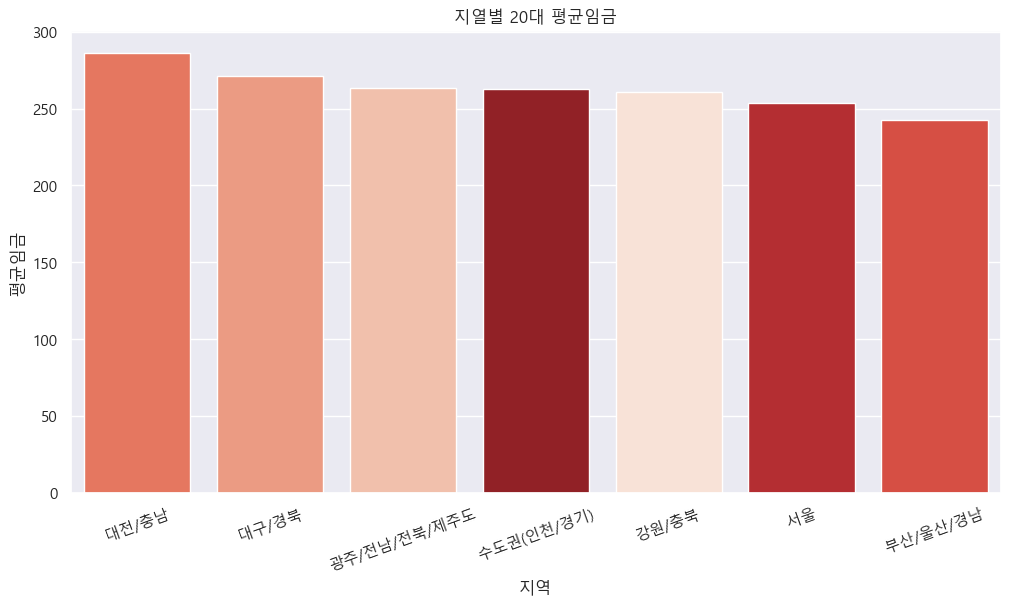

In [97]:
sns.barplot(data = group_df, x = '지역',
            y = '평균임금', 
            hue = '지역', 
            palette = 'Reds', 
            order = group_df.sort_values(by = '평균임금', ascending = False)['지역'])

plt.title("지열별 20대 평균임금")
plt.xticks(rotation = 20)
plt.show()

---
강사

---

In [99]:
# 20대의 데이터를 가져온다.
df2 = df1.query('연령대 == 20')

df3 = df2[['지역', '평균임금']]
# 각 지역별 20대의 평균임금을 출력한다.
df3.groupby('지역').mean().sort_values('평균임금', ascending=False)

,평균임금
지역,
대전/충남,286.036364
대구/경북,271.000000
광주/전남/전북/제주도,263.139785
수도권(인천/경기),262.818584
강원/충북,261.000000
서울,253.583333
부산/울산/경남,242.752941


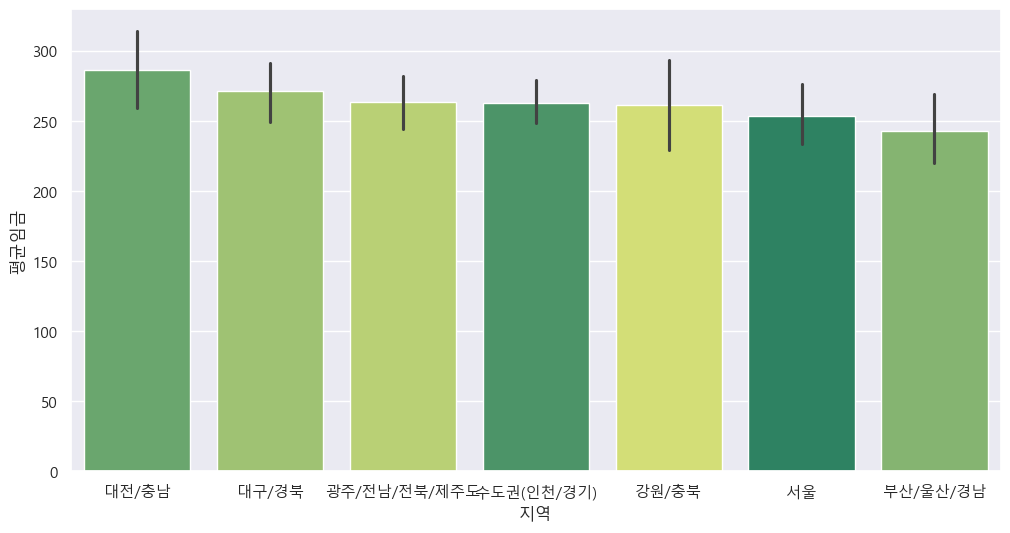

In [100]:
a1 = df3.groupby('지역').mean().sort_values('평균임금', ascending=False)

sns.barplot(data=df2, x='지역', y='평균임금', order=a1.index, 
            hue='지역', palette='summer')
plt.show()

### 지도 시각화

In [102]:
import folium
import json

In [103]:
map1 = folium.Map(location=[36.8, 127.5], zoom_start=6)
map1

In [104]:
# 행정 구역별 경계선 데이터를 불러온다.
# https://github.com/vuski/admdongkor
geo_path = 'data/korea.json'
geo_dict = json.load(open(geo_path, encoding='utf-8'))
# geo_dict

In [105]:
# 각 행정구역이름을 가져온다.
a1 = geo_dict['features']

# 행정구역 이름을 담을 리스트
ctp_kor_nm_list = []

for a2 in a1 :
    a3 = a2['properties']['CTP_KOR_NM']
    ctp_kor_nm_list.append(a3)

ctp_kor_nm_list

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [106]:
# 테스트 데이터 준비
# Series의 index가 행정구역 데이터와 동일해야 한다.
a1 = np.arange(10, 180, 10)
test_data = pd.Series(a1, index=ctp_kor_nm_list)
test_data
# Series의 index가 행정구역 데이터와 동일해야 한다.
a1 = np.arange(10, 180, 10)
test_data = pd.Series(a1, index=ctp_kor_nm_list)
test_data

강원도         10
경기도         20
경상남도        30
경상북도        40
광주광역시       50
대구광역시       60
대전광역시       70
부산광역시       80
서울특별시       90
세종특별자치시    100
울산광역시      110
인천광역시      120
전라남도       130
전라북도       140
제주특별자치도    150
충청남도       160
충청북도       170
dtype: int32

In [107]:
# 지도를 그린다.
map1 = folium.Map(location=[36.8, 127.5], zoom_start=6)
# 지도를 설정한다.
folium.Choropleth(
    # 행정구역 데이터를 설정해준다.
    geo_data=geo_dict,
    # 각 지역별로 적용할 데이터를 설정한다.
    data = test_data,
    # data의 index와 geo_data의 행정구역 이름을 매핑할 수 있도록
    # geo_data의 어떤 것을 사용할 것인지 지정해준다.
    key_on='properties.CTP_KOR_NM',
    # 사용할 색상
    # https://python-visualization.github.io/folium/latest/advanced_guide/colormaps.html
    fill_color='Accent',
).add_to(map1)
map1

### 7. 종교 유무에 따른 평균 임금을 비교한다.

In [109]:
df2 = df1.copy()
df2.head()

,성별,출생년도,혼인상태,종교유뮤,직종,평균임금,지역,나이,연령대,연령층,혼인유지
0,여자,1945.0,사별,있음,NaN,NaN,서울,78.0,70,노년,유지상태
1,남자,1948.0,사별,없음,942.0,183.0,서울,75.0,70,노년,유지상태
2,남자,1942.0,이혼,있음,782.0,NaN,서울,81.0,80,노년,이혼상태
3,남자,1962.0,유배우,있음,855.0,270.0,서울,61.0,60,장년,유지상태
4,여자,1963.0,유배우,있음,421.0,33.0,서울,60.0,60,장년,유지상태


In [110]:
df2.isna().sum()

성별         0
출생년도       0
혼인상태       0
종교유뮤       0
직종      7407
평균임금    9921
지역         0
나이         0
연령대        0
연령층        6
혼인유지       0
dtype: int64

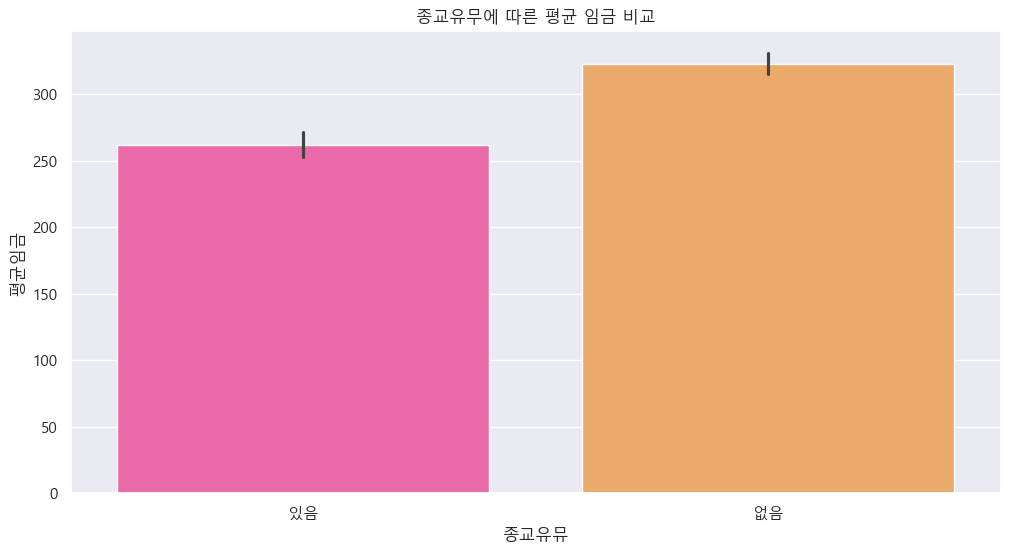

In [111]:
sns.barplot(data = df2, x = '종교유뮤', y = '평균임금', hue = '종교유뮤', palette = 'spring')
plt.title('종교유무에 따른 평균 임금 비교')
plt.show()

### 8. 현재 이혼한 사람들과 그렇지 않은 사람들(미혼, 비해당은 제외)의 평균 임금을 비교한다.

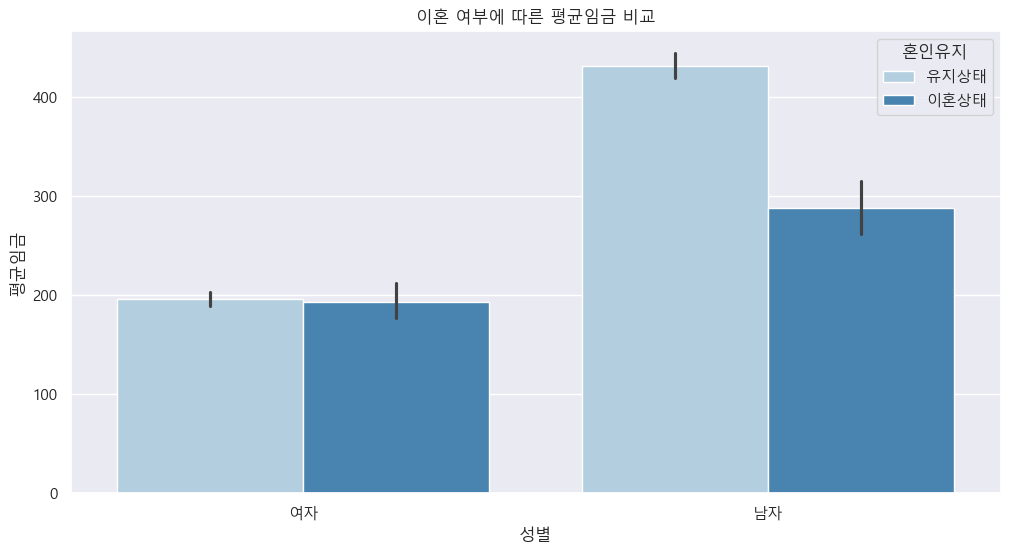

In [222]:
sns.barplot(data = df2.query('혼인유지 != "해당없음"'), x = '성별', y = '평균임금', hue = '혼인유지', palette = 'Blues')
plt.title('이혼 여부에 따른 평균임금 비교')
plt.show()

### 9. 각 지역별 노령인구(65세 이상)의 평균 급여를 비교하여 본다.

In [230]:
order =  df2.query('나이 >= 65').groupby(['지역'])['평균임금'].mean().sort_values(ascending = False).index
order 

Index(['서울', '수도권(인천/경기)', '부산/울산/경남', '대구/경북', '대전/충남', '광주/전남/전북/제주도',
       '강원/충북'],
      dtype='object', name='지역')

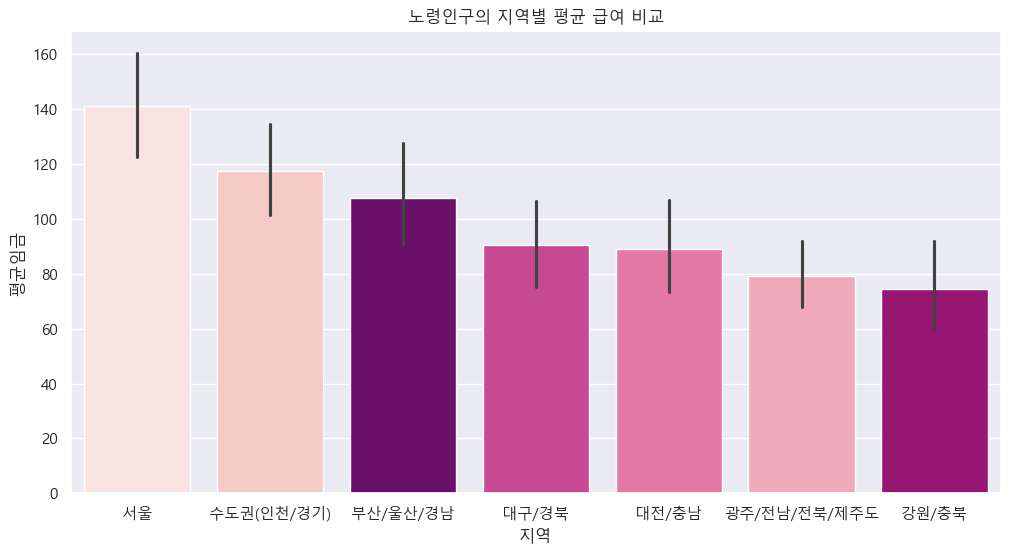

In [232]:
sns.barplot(data = df2.query('나이 >= 65'), x ='지역', y = '평균임금', hue = '지역', palette = 'RdPu'
            , order = order )
plt.title('노령인구의 지역별 평균 급여 비교')
plt.show()

In [282]:
# 행정 구역별 경계선 데이터를 불러온다.
geo_path = 'data/korea.json'
geo_dict = json.load(open(geo_path, encoding='utf-8'))
geo_dict

{'type': 'FeatureCollection',
 'bbox': [124.7893155286271,
  33.172610584346295,
  130.96524575425667,
  38.54255349620522],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[128.54880989370014, 38.301950820518755],
      [128.5600921732829, 38.25735515107489],
      [128.59761716763322, 38.21480959198724],
      [128.60765942875406, 38.15215810015938],
      [128.64206854447866, 38.106588627599855],
      [128.66939445927846, 38.08634208760778],
      [128.69458333244307, 38.0453480455091],
      [128.73326744935343, 38.01787054352603],
      [128.79463671088126, 37.92801060958252],
      [128.8233689458956, 37.90753318801803],
      [128.83001997197184, 37.88458455426084],
      [128.8786226699225, 37.8294251483049],
      [128.9852771172376, 37.74045442473868],
      [129.01482411622038, 37.70600771921262],
      [129.05505018456222, 37.675224044111836],
      [129.04353313092116, 37.642745963305245],
      [129.05392180246835, 37.62123228307

In [284]:
# 각 행정구역이름을 가져온다.
a1 = geo_dict['features']

# 행정구역 이름을 담을 리스트
ctp_kor_nm_list = []

for a2 in a1 :
    a3 = a2['properties']['CTP_KOR_NM']
    ctp_kor_nm_list.append(a3)

ctp_kor_nm_list

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [290]:
# 색상을 입히기 위한 데이터를 준비한다.
temp1 = [
    result1.loc['강원/충북'].values[0],
    result1.loc['수도권(인천/경기)'].values[0],
    result1.loc['부산/울산/경남'].values[0],
    result1.loc['대구/경북'].values[0],
    result1.loc['광주/전남/전북/제주도'].values[0],
    result1.loc['대구/경북'].values[0],
    result1.loc['대전/충남'].values[0],
    result1.loc['부산/울산/경남'].values[0],
    result1.loc['서울'].values[0],
    result1.loc['대전/충남'].values[0],
    result1.loc['부산/울산/경남'].values[0],
    result1.loc['수도권(인천/경기)'].values[0],
    result1.loc['광주/전남/전북/제주도'].values[0],
    result1.loc['광주/전남/전북/제주도'].values[0],
    result1.loc['광주/전남/전북/제주도'].values[0],
    result1.loc['대전/충남'].values[0],
    result1.loc['강원/충북'].values[0],
]

map_color_data = pd.Series(temp1, index=ctp_kor_nm_list)
map_color_data = map_color_data.astype(float)
map_color_data

강원도         608.0
경기도        1587.0
경상남도       1172.0
경상북도        771.0
광주광역시      1242.0
대구광역시       771.0
대전광역시       726.0
부산광역시      1172.0
서울특별시       803.0
세종특별자치시     726.0
울산광역시      1172.0
인천광역시      1587.0
전라남도       1242.0
전라북도       1242.0
제주특별자치도    1242.0
충청남도        726.0
충청북도        608.0
dtype: float64

In [292]:
# 지도를 그린다.
map1 = folium.Map(location=[36.8, 127.5], zoom_start=5.0)
# 지도를 설정한다.
folium.Choropleth(
    # 행정구역 데이터를 설정해준다.
    geo_data=geo_dict,
    # 각 지역별로 적용할 데이터를 설정한다.
    data = map_color_data,
    # data의 index와 geo_data의 행정구역 이름을 매핑할 수 있도록
    # geo_data의 어떤 것을 사용할 것인지 지정해준다.
    key_on='properties.CTP_KOR_NM',
    # 사용할 색상
    # https://python-visualization.github.io/folium/latest/advanced_guide/colormaps.html
    fill_color='Accent',

).add_to(map1)
map1